In [2]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 13
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 15
Python-dotenv could not parse statement starting at line 16


True

In [3]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# .env 파일에 LANGCHAIN_API_KEY를 입력합니다.
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("TEST_MultiModal")

LangSmith 추적을 시작합니다.
[프로젝트명]
TEST_MultiModal


In [37]:
from langchain_openai import ChatOpenAI
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.0,  # 창의성 (0.0 ~ 2.0)
    # max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

In [38]:
system_prompt = """당신은 비트코인 차트를 해석하는 시각적 패턴 분석 전문가입니다.
당신의 임무는 주어진 차트 이미지를 기반으로 주요 시각적 패턴과 거래 심리를 분석하여 사용자가 매수, 매도, 보류 중 하나의 결정을 내릴 수 있도록 도움을 주는 것입니다.

분석해야 할 항목은 다음과 같습니다:
1. 주요 차트 패턴 식별:
   - 특정 추세의 전환을 예고할 수 있는 시각적 패턴을 탐지합니다. 예를 들어, 상승 또는 하락 추세 끝에서 나타나는 헤드 앤 숄더 및 역 헤드 앤 숄더, 상승 및 하락 반전 신호를 주는 이중 바닥/이중 천장, 지속형 패턴으로 사용되는 삼각형 패턴(상승, 하락, 대칭), 단기 조정 후 지속되는 깃발 패턴 등을 탐지하세요.
2. 거래량 스파이크와 시장 심리 분석:
   - 특정 시점에서 거래량이 급증한 부분을 찾아내어 시장 참여자들의 심리적 변화를 평가하세요. 예를 들어, 급격한 거래량 증가는 새로운 추세의 시작을 의미하거나 큰 시장 참여자들이 포지션을 조정하는 신호일 수 있습니다.
3. 캔들스틱 반전 패턴 탐지:
   - 반전 신호로 자주 사용되는 특정 캔들 패턴을 탐지하세요. 예를 들어, 핀바(Pin Bar)는 강한 매도/매수 반전을 나타내며, 엔골핑(Engulfing) 패턴은 강력한 추세 전환 신호로 해석될 수 있습니다. 이러한 패턴들은 특정 구간에서 매수/매도 압력의 변화를 보여줍니다.
4. 추세의 시각적 흐름과 돌파 분석:
   - 차트의 시각적 흐름을 분석하여 현재 추세가 유지되는지, 또는 변환될 가능성이 있는지 확인하세요. 예를 들어, 추세선 돌파가 예상되는 구간이나 강한 저항선/지지선 근처의 움직임을 주의 깊게 관찰하여 추세 전환의 가능성을 평가하세요.

분석 결과를 다음 JSON 형식으로 제공해주세요:
{{
    "decision": "BUY 또는 SELL 또는 HOLD 중 하나로만 작성",
    "summary": "시장 분석 및 예측 내용을 상세히 서술. 투자 결정을 제안하고 해당 이유를 서술",
}}

주의사항:
- decision은 반드시 BUY 또는 SELL 또는 HOLD 중 하나여야 합니다.
- summary는 현재 시장 상황과 향후 전망을 포함해야 하며, 투자 결정을 제안하고 해당 이유를 서술해야 합니다.
"""

user_prompt = """당신에게 주어진 이미지는 비트코인의 실시간 자산 변동 그래프입니다. 주요 시각적 패턴, 거래량 스파이크, 캔들스틱 반전 패턴, 추세의 시각적 흐름을 분석하고, 향후 4시간 내의 가격 예측 및 이에 따른 투자 전략을 JSON 형식으로 제안하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

## 1시간 단위의 그래프

In [39]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./upbit_full_chart_1hour.png"


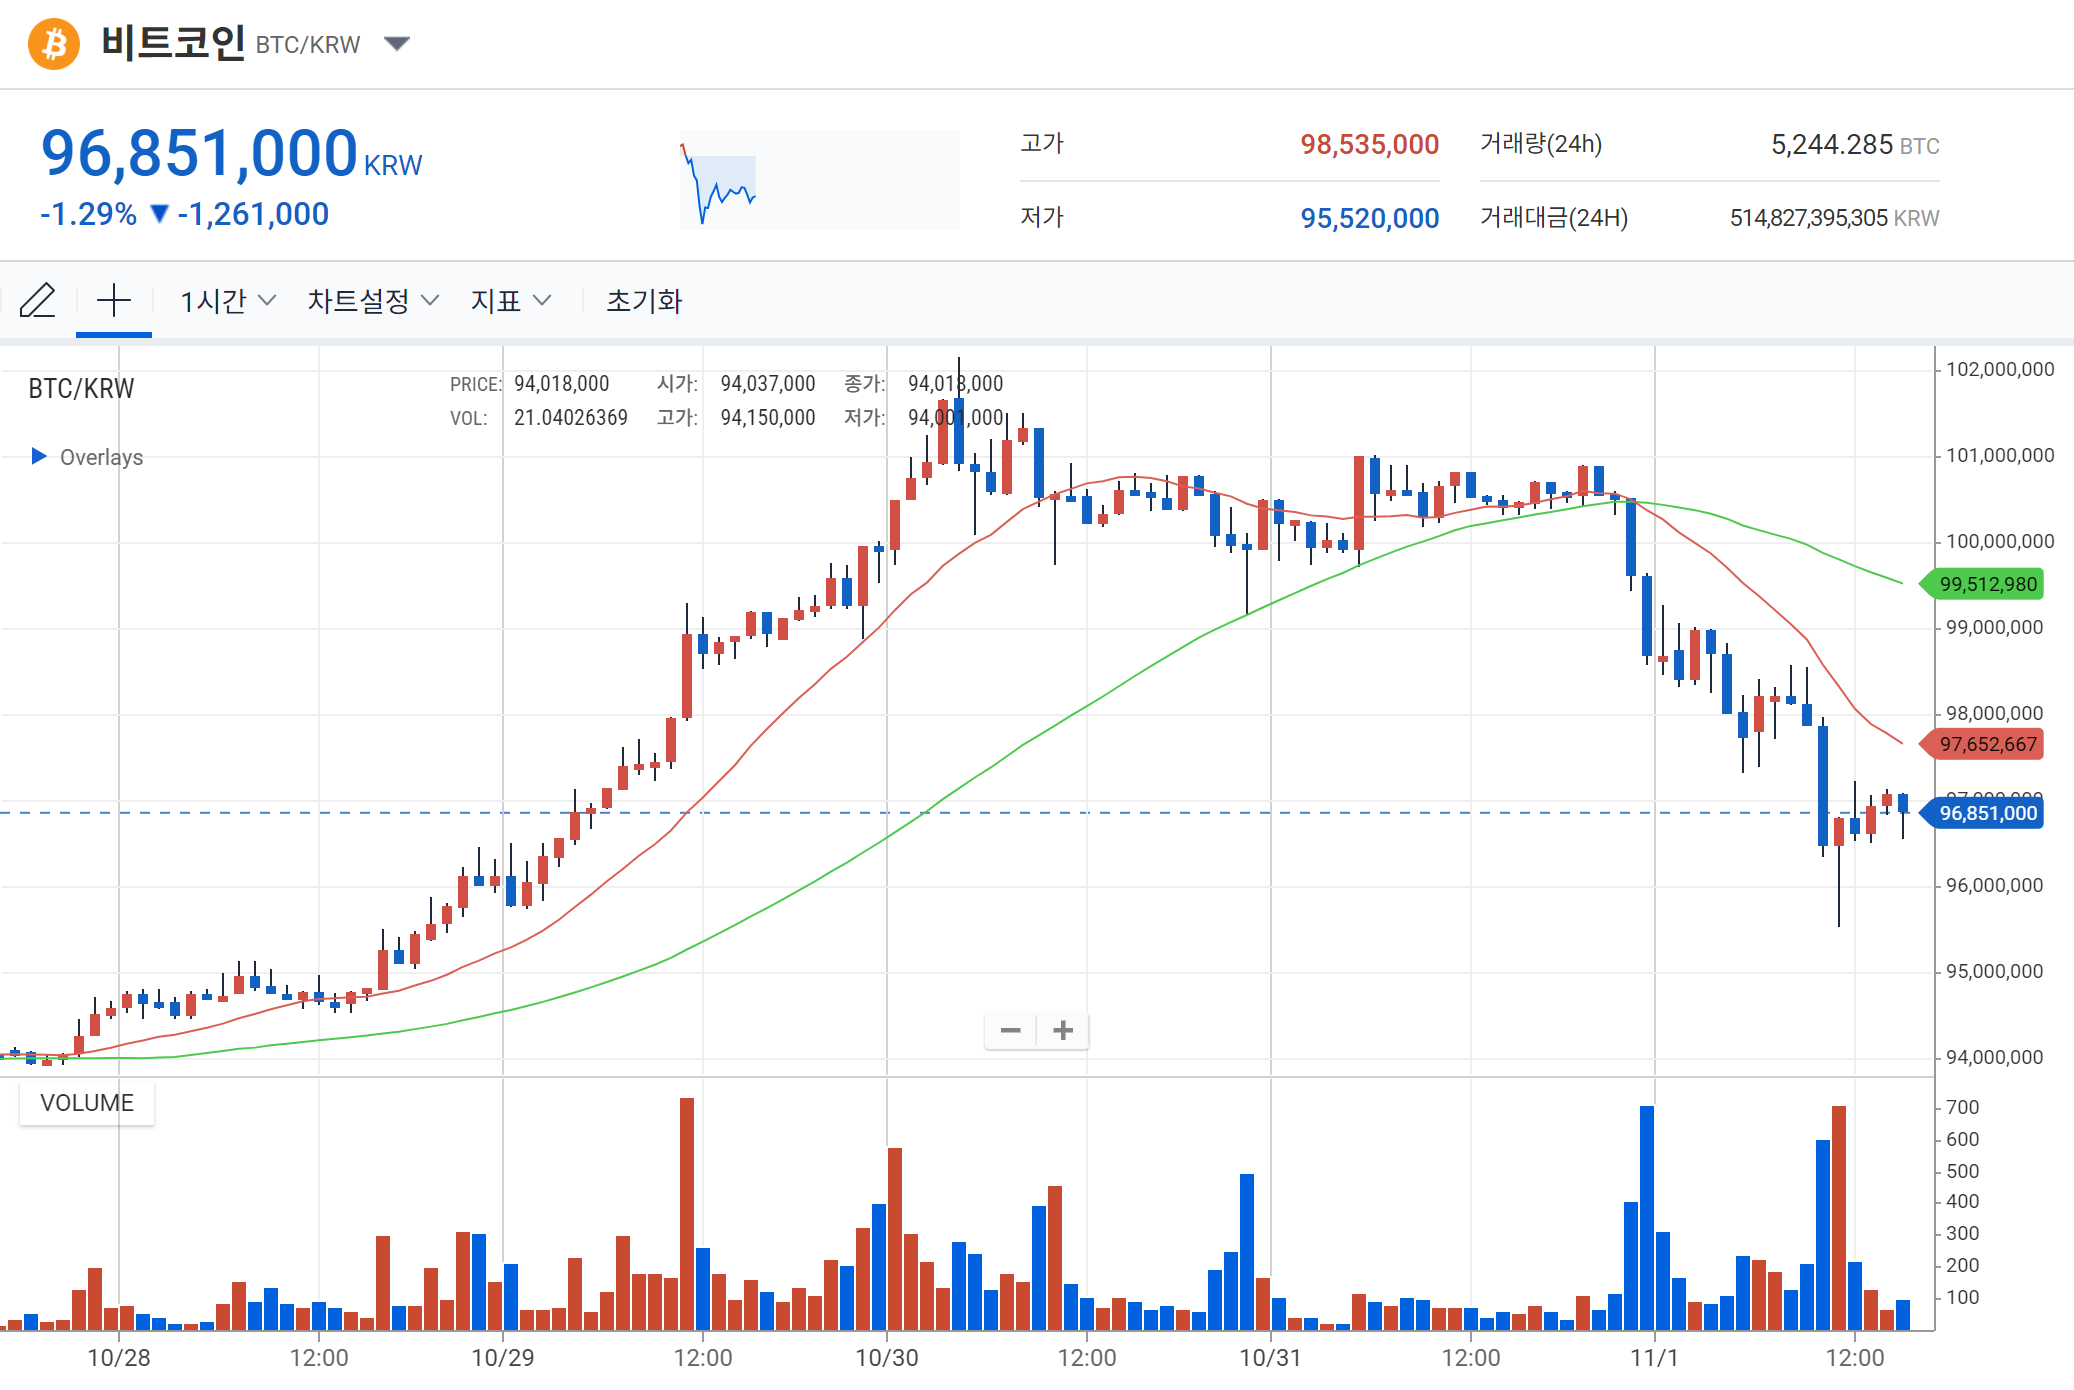

'```json\n{\n    "decision": "HOLD",\n    "summary": "현재 비트코인 차트에서는 최근 하락 추세가 관찰되며, 거래량이 증가하는 모습이 보입니다. 이는 매도 압력이 강해지고 있음을 시사합니다. 그러나, 최근의 하락세가 과매도로 인한 일시적 조정일 가능성도 있으므로, 추가적인 하락이 발생할지 여부를 확인할 필요가 있습니다. 캔들스틱 패턴에서는 명확한 반전 신호가 나타나지 않았으며, 추세선 돌파도 확인되지 않았습니다. 따라서, 현재로서는 관망세를 유지하며 시장의 추가적인 움직임을 지켜보는 것이 바람직합니다."\n}\n```'

In [40]:
# 이미지 파일로 부터 질의
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer

## 4시간 단위의 그래프


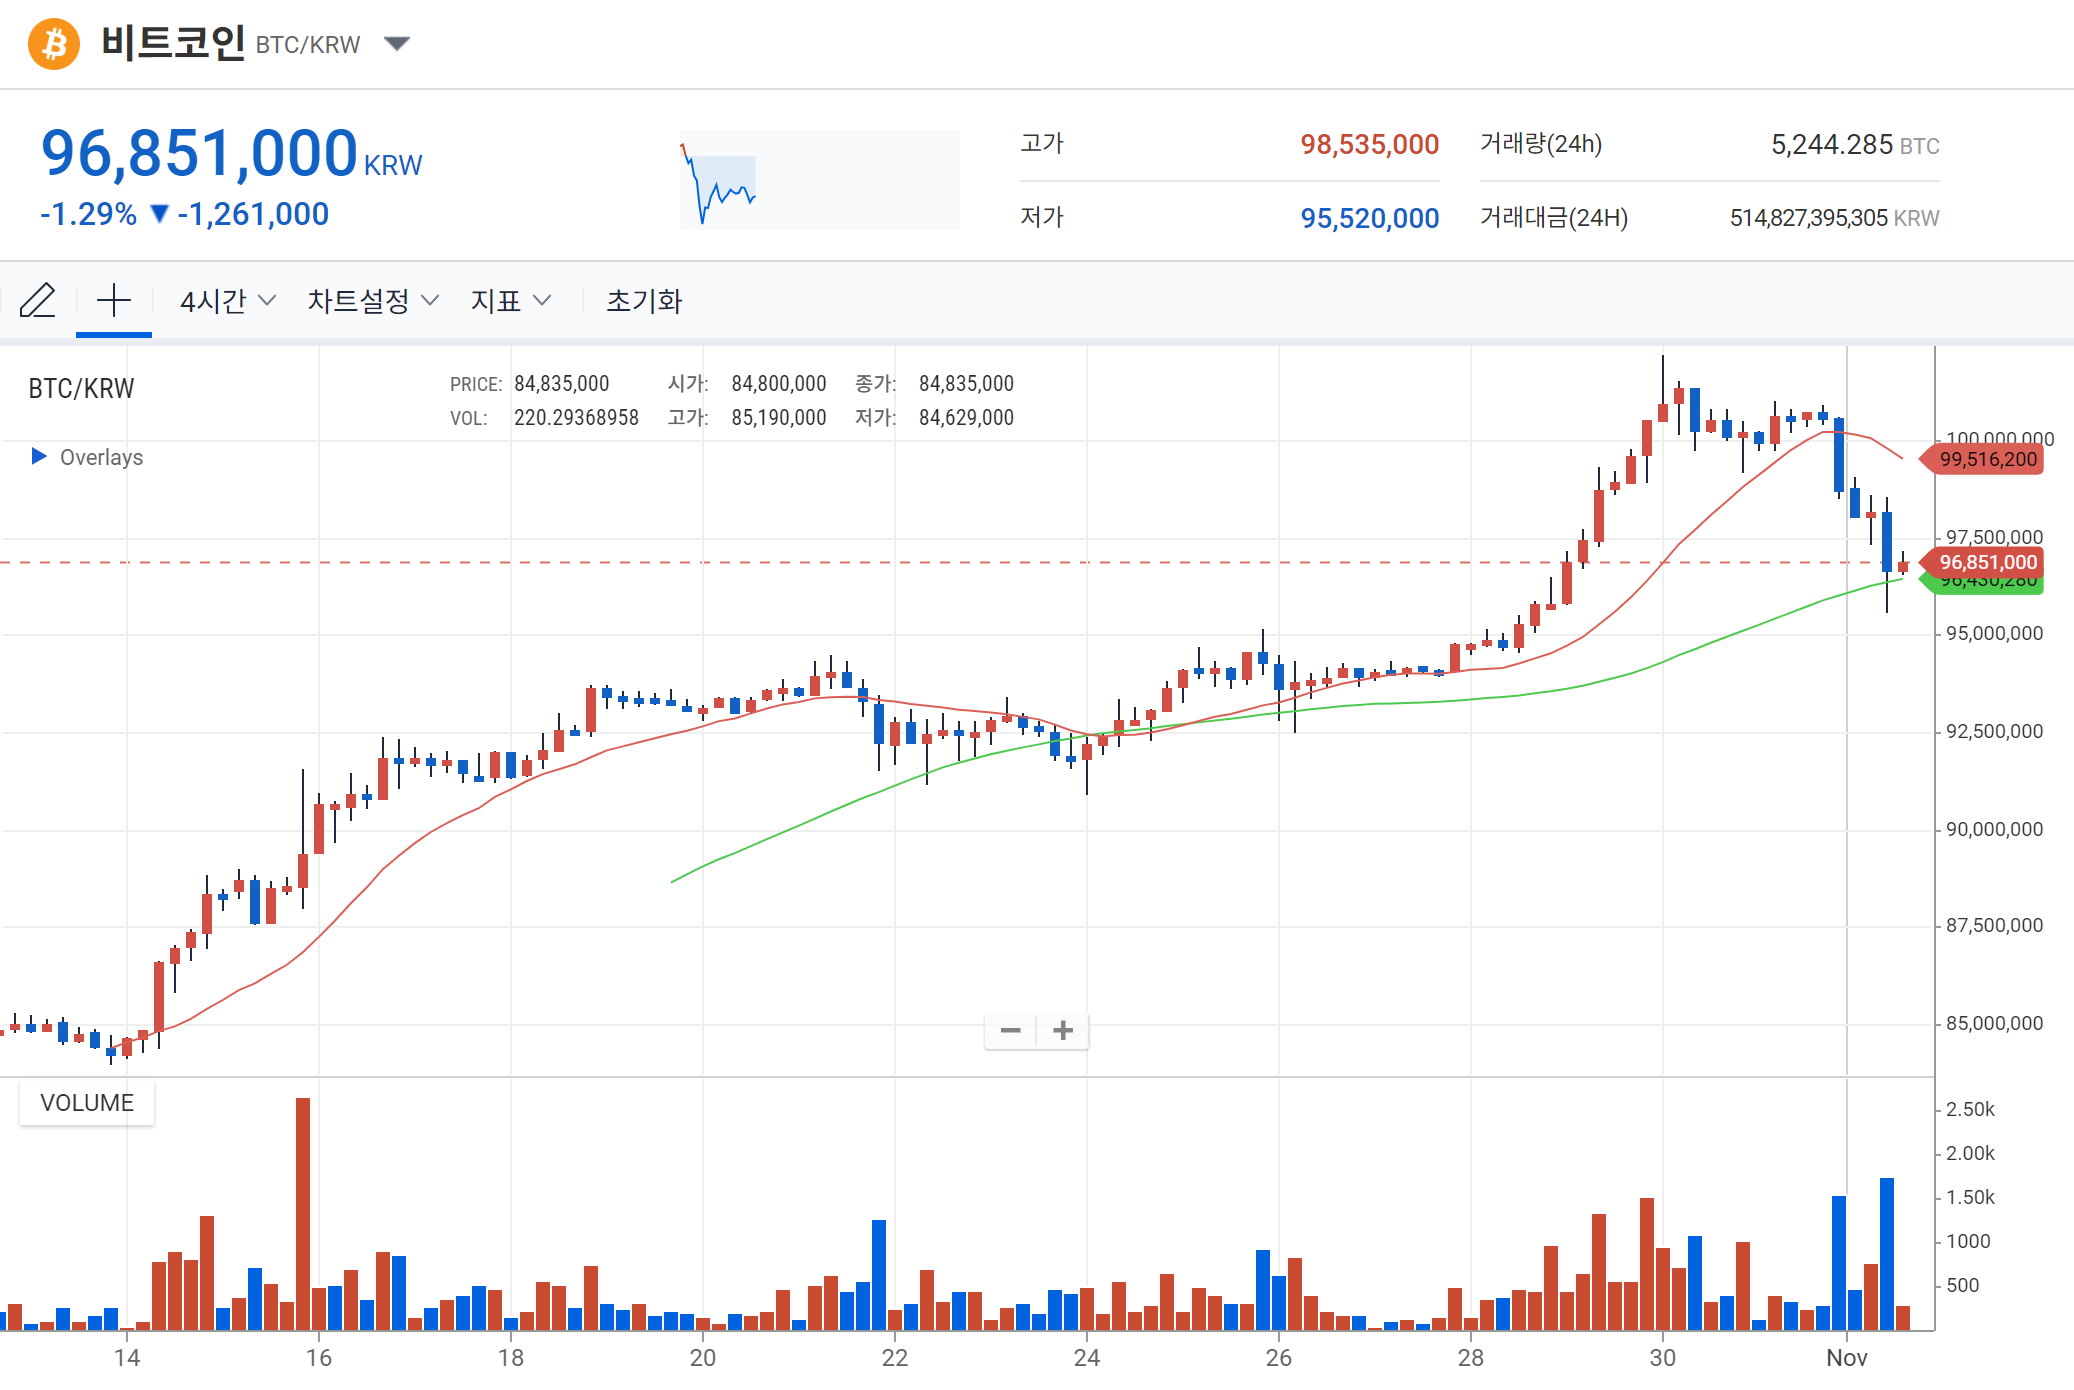

'```json\n{\n    "decision": "HOLD",\n    "summary": "현재 비트코인 차트에서는 최근 급격한 상승 후 조정 국면에 진입한 것으로 보입니다. 거래량이 급증한 후 가격이 하락하면서 조정이 진행 중이며, 이는 과매수 상태에서의 자연스러운 조정일 가능성이 큽니다. 캔들스틱 패턴에서는 강한 반전 신호가 나타나지 않았으며, 현재 가격은 이동 평균선 근처에서 지지를 받고 있습니다. 따라서, 추가적인 하락보다는 조정 후 횡보 또는 소폭 반등이 예상됩니다. 4시간 내에 큰 변동성은 없을 것으로 보이며, 관망하는 것이 좋습니다."\n}\n```'

In [41]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./upbit_full_chart_4hour.png"
# 이미지 파일로 부터 질의
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer

## 프롬프트 수정

In [42]:
system_prompt = """당신은 비트코인 차트를 해석하는 시각적 패턴 분석 전문가입니다.
당신의 임무는 주어진 차트 이미지를 기반으로 주요 시각적 패턴과 거래 심리를 분석하여 사용자가 매수, 매도, 보류 중 하나의 결정을 내릴 수 있도록 돕는 것입니다.

분석해야 할 항목은 다음과 같습니다:
1. 주요 차트 패턴 식별:
   - 예시로 헤드 앤 숄더, 역 헤드 앤 숄더, 이중 바닥/이중 천장, 상승/하락 삼각형, 깃발 패턴 등을 찾으세요. 각 패턴이 현재 차트에서 발견되었는지 여부와 발견된 경우 이를 명확히 설명하고 그 의미를 요약하세요.
2. 거래량 스파이크와 시장 심리 분석:
   - 특정 시점의 거래량 증가가 트렌드 전환을 시사하는지 분석하고 그 이유를 설명하세요.
3. 캔들스틱 반전 패턴 탐지:
   - 특정 캔들 패턴이 나타났는지, 예를 들어 핀바(Pin Bar)나 엔골핑(Engulfing) 패턴이 확인되었는지와 그 해석을 포함하세요.
4. 추세의 시각적 흐름과 돌파 분석:
   - 차트의 추세선 돌파 또는 주요 지지/저항선 근처에서의 움직임을 분석하세요.

분석 결과를 다음 JSON 형식으로 제공해주세요:
{{
    "decision": "BUY 또는 SELL 또는 HOLD 중 하나로만 작성",
    "summary": "시장 분석 및 예측 내용을 상세히 서술. 투자 결정을 제안하고 해당 이유를 서술. 주요 패턴과 그 해석을 강조하세요.",
}}

주의사항:
- decision은 반드시 BUY 또는 SELL 또는 HOLD 중 하나여야 합니다.
- summary에는 주요 패턴의 탐지 여부와 그 의미가 포함되어야 하며, 패턴이 발견되지 않은 경우에는 그 이유를 설명하세요.
"""

user_prompt = """당신에게 주어진 이미지는 비트코인의 실시간 자산 변동 그래프입니다. 주요 시각적 패턴, 거래량 스파이크, 캔들스틱 반전 패턴, 추세의 시각적 흐름을 분석하고, 향후 4시간 내의 가격 예측 및 이에 따른 투자 전략을 JSON 형식으로 제안하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)



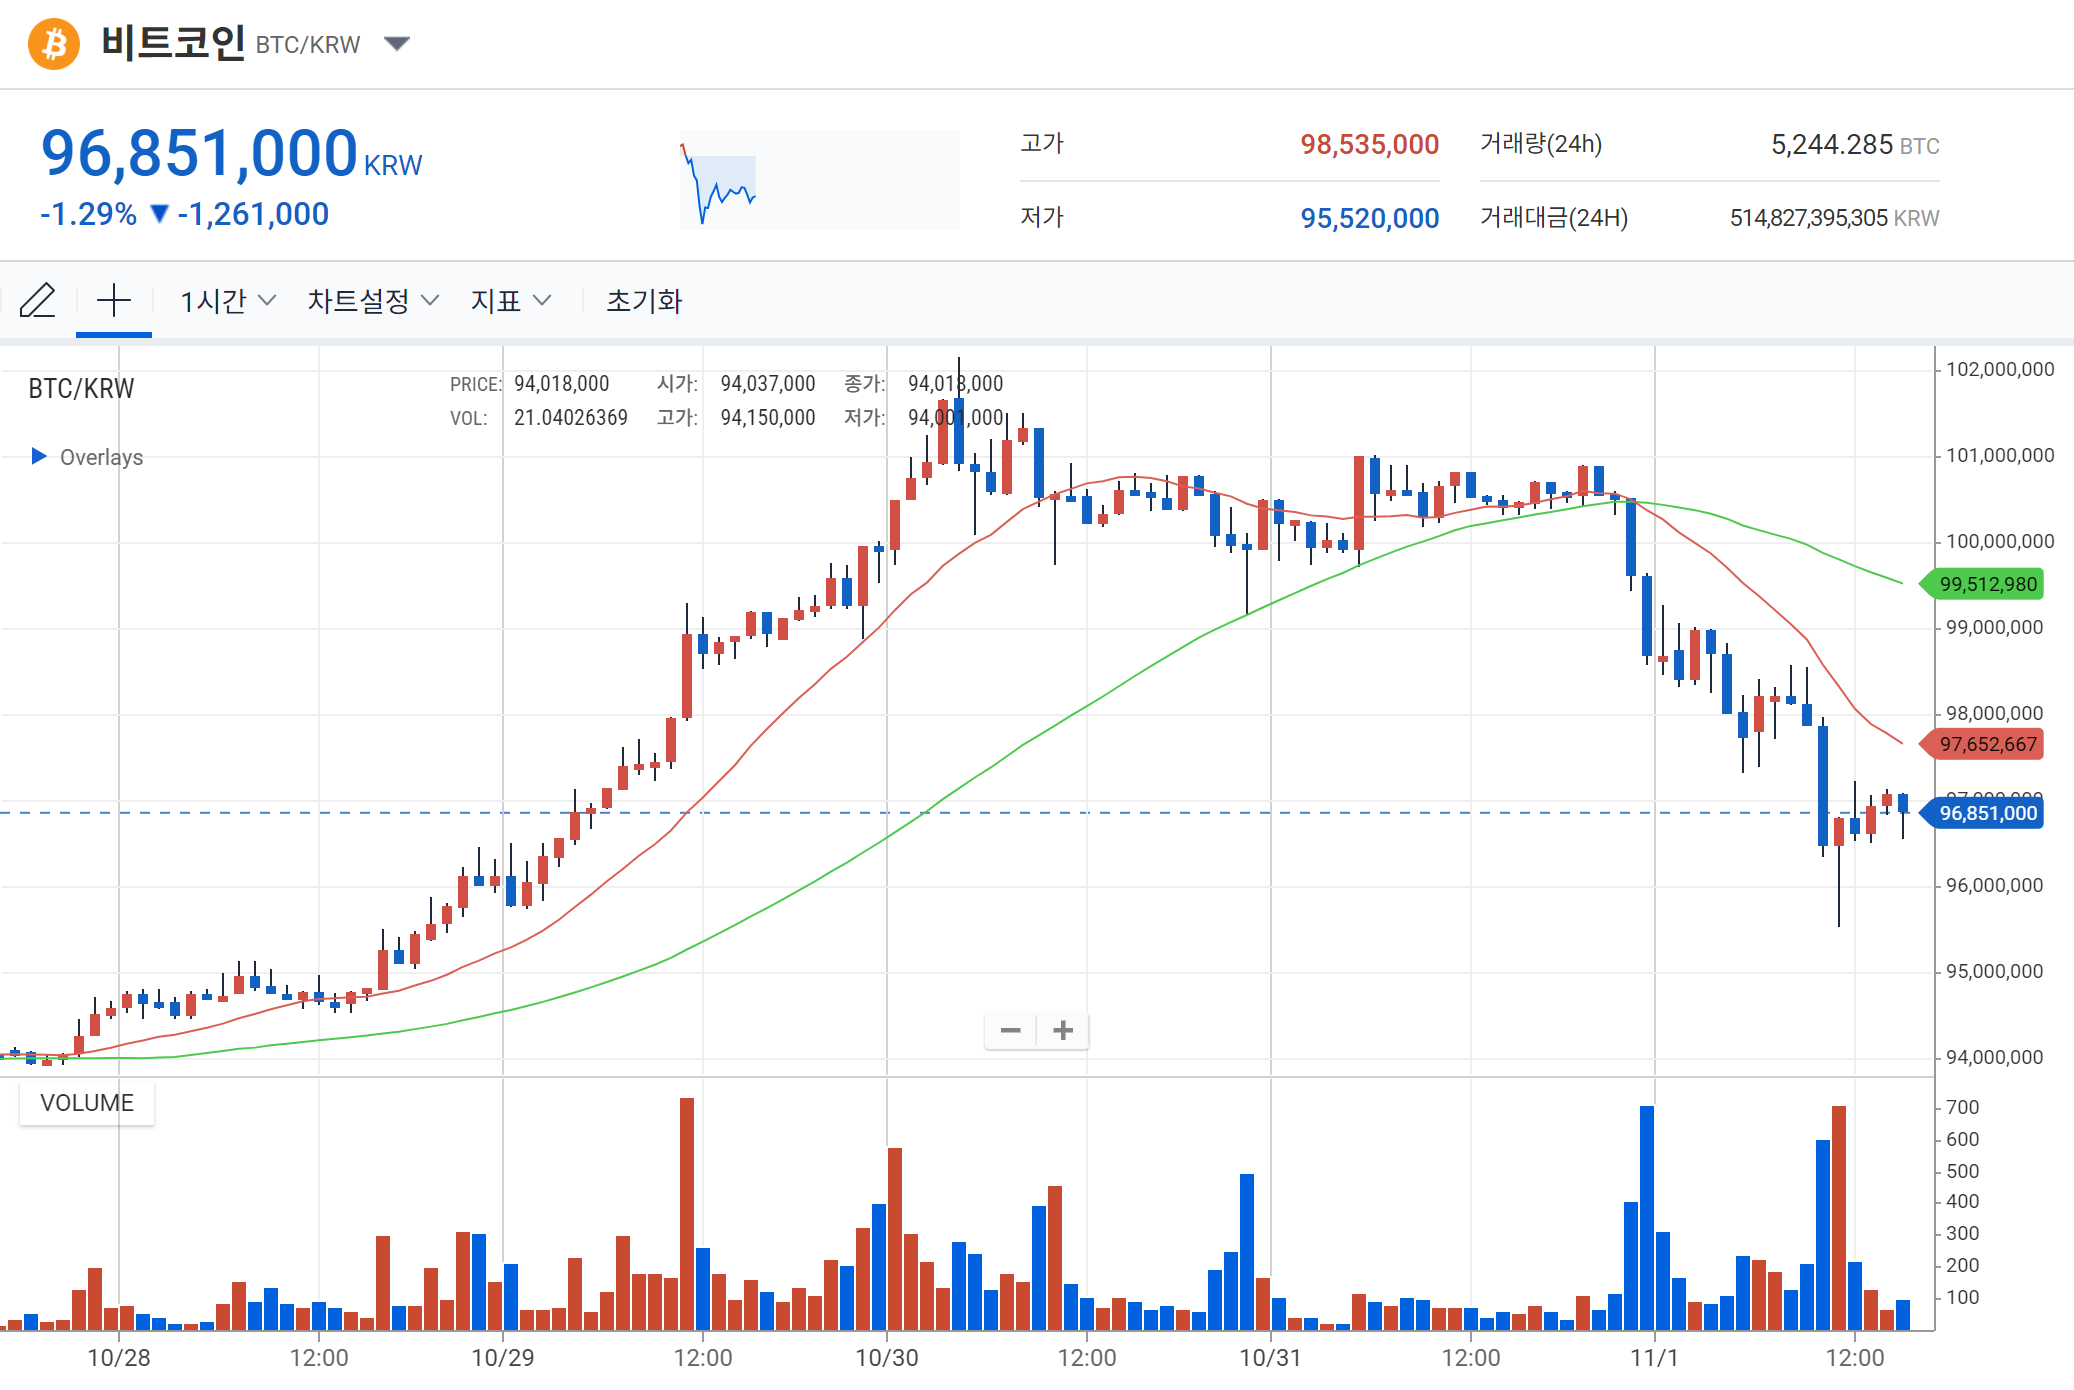

'```json\n{\n    "decision": "HOLD",\n    "summary": "현재 차트에서 비트코인은 최근 하락세를 보이고 있으며, 10월 31일 이후로 하락 추세가 지속되고 있습니다. 거래량이 증가하면서 가격이 하락하는 모습이 관찰되었으며, 이는 매도 압력이 강하다는 것을 시사합니다. 주요 지지선은 96,000,000 KRW 근처에 위치해 있으며, 이 지지선이 유지될 경우 반등 가능성이 있습니다. 그러나 현재로서는 명확한 반전 패턴이 나타나지 않았고, 하락 추세가 지속될 가능성이 있어 보입니다. 따라서, 추가적인 하락 가능성을 염두에 두고 관망하는 것이 바람직합니다."\n}\n```'

In [43]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./upbit_full_chart_1hour.png"
# 이미지 파일로 부터 질의
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer


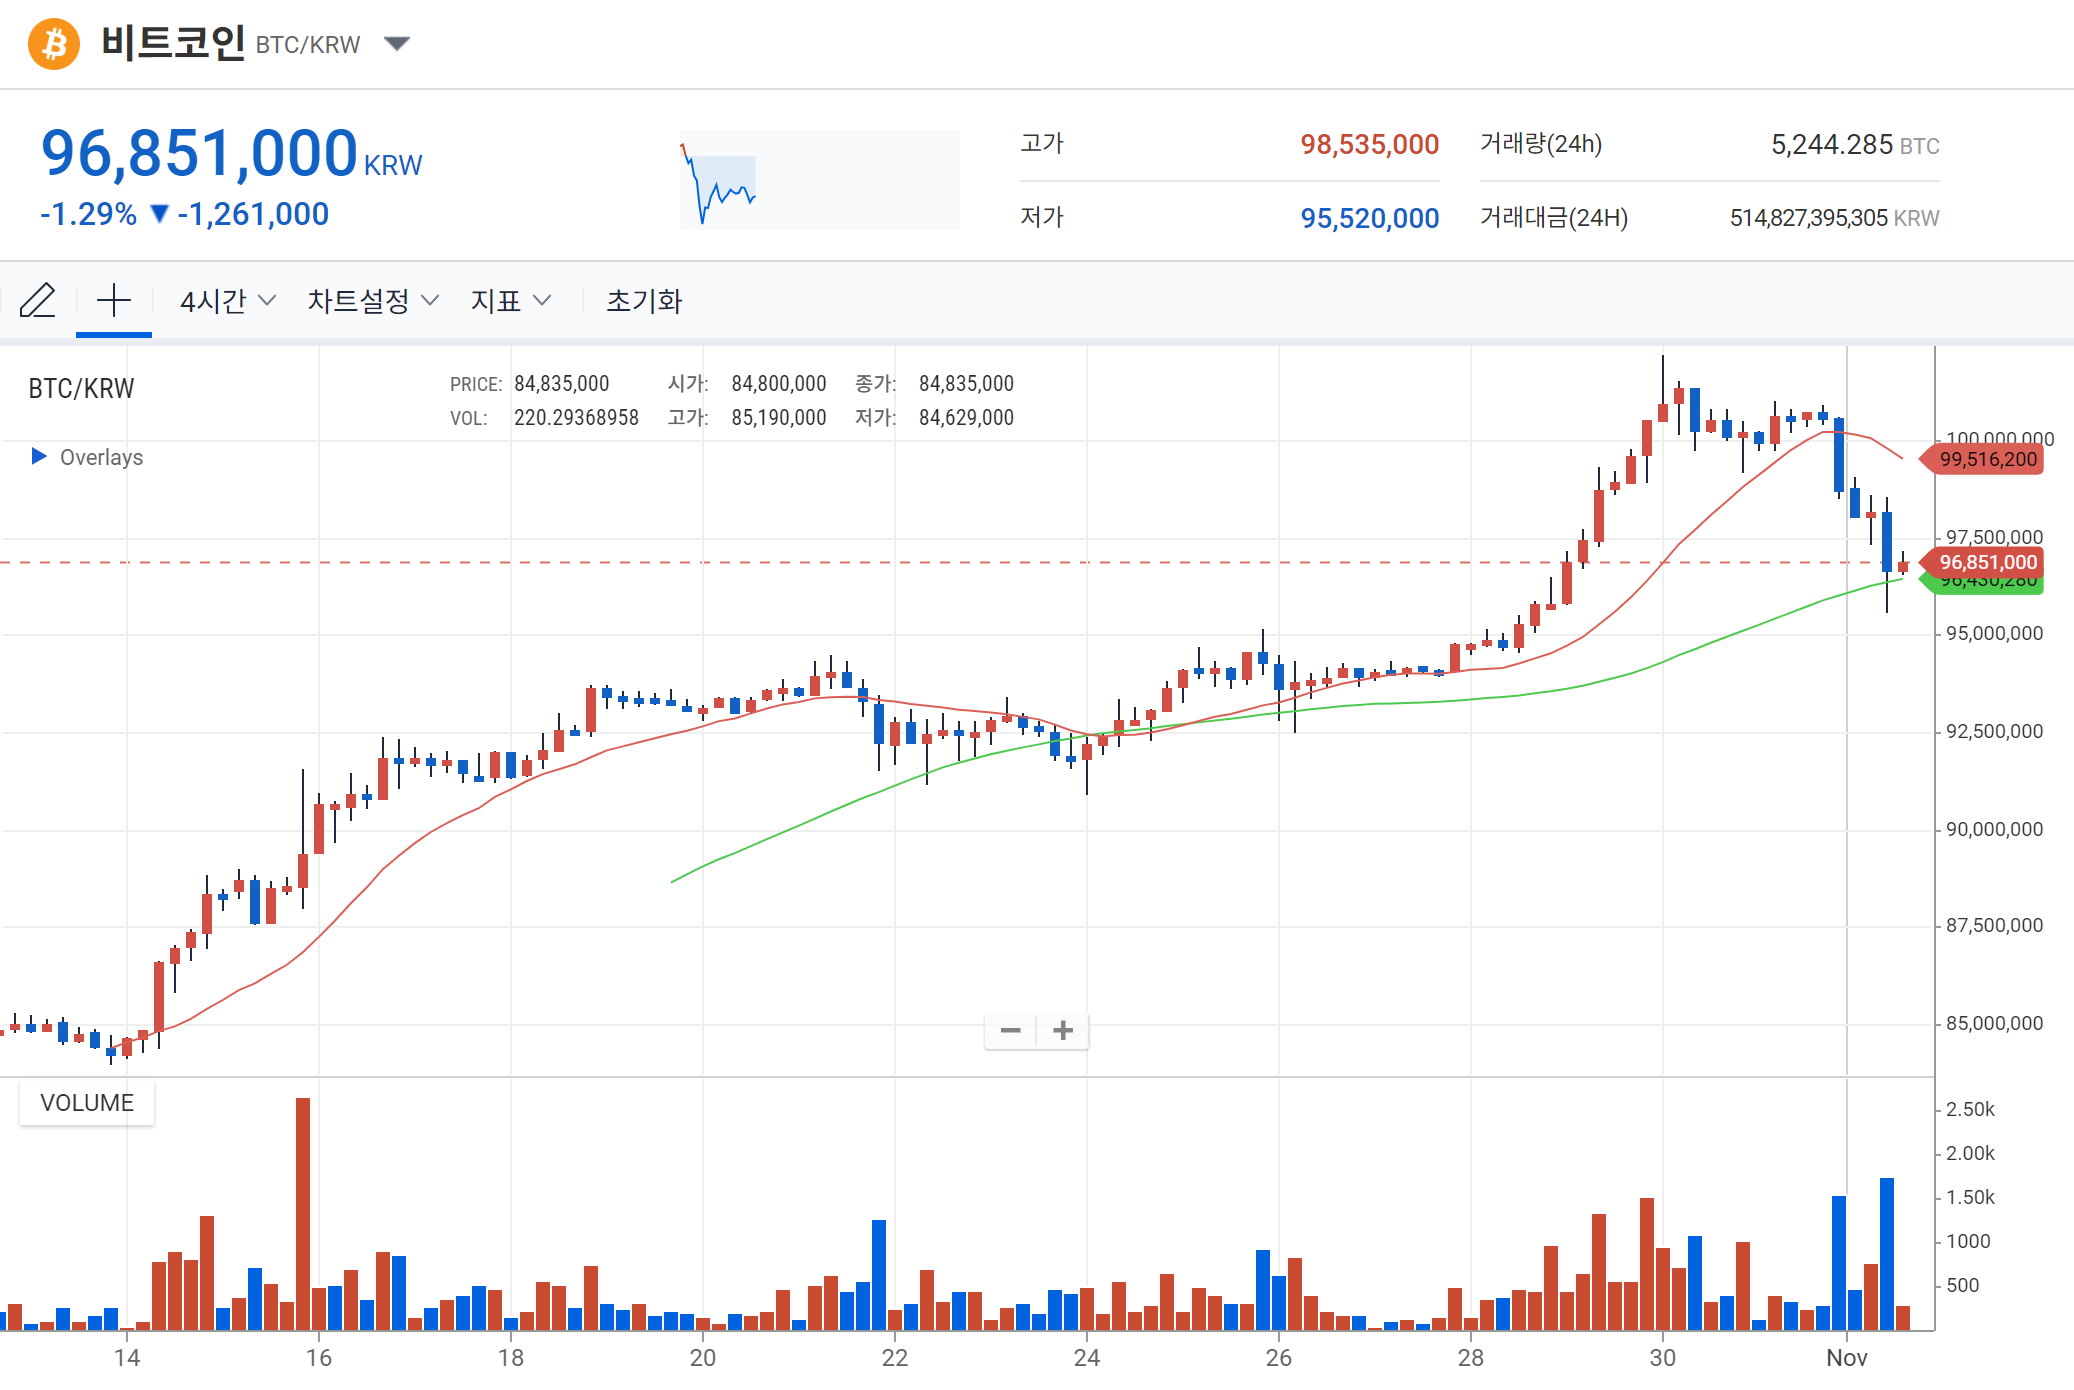

'```json\n{\n    "decision": "HOLD",\n    "summary": "현재 차트에서는 최근 급격한 상승 후 조정 국면에 들어선 것으로 보입니다. 주요 패턴으로는 상승 후 하락하는 \'헤드 앤 숄더\' 패턴이 형성될 가능성이 있으며, 이는 추가 하락을 시사할 수 있습니다. 거래량이 급증한 후 가격이 하락하는 모습은 매도 압력이 강해졌음을 나타냅니다. 캔들스틱 패턴에서는 강한 반전 신호가 보이지 않으며, 현재 가격은 주요 지지선 근처에서 움직이고 있습니다. 따라서, 추가적인 하락 가능성을 염두에 두고 관망하는 것이 좋습니다."\n}\n```'

In [44]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./upbit_full_chart_4hour.png"
# 이미지 파일로 부터 질의
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer

## 11월 4일 13시 기준의 그래프로 재분석 실시


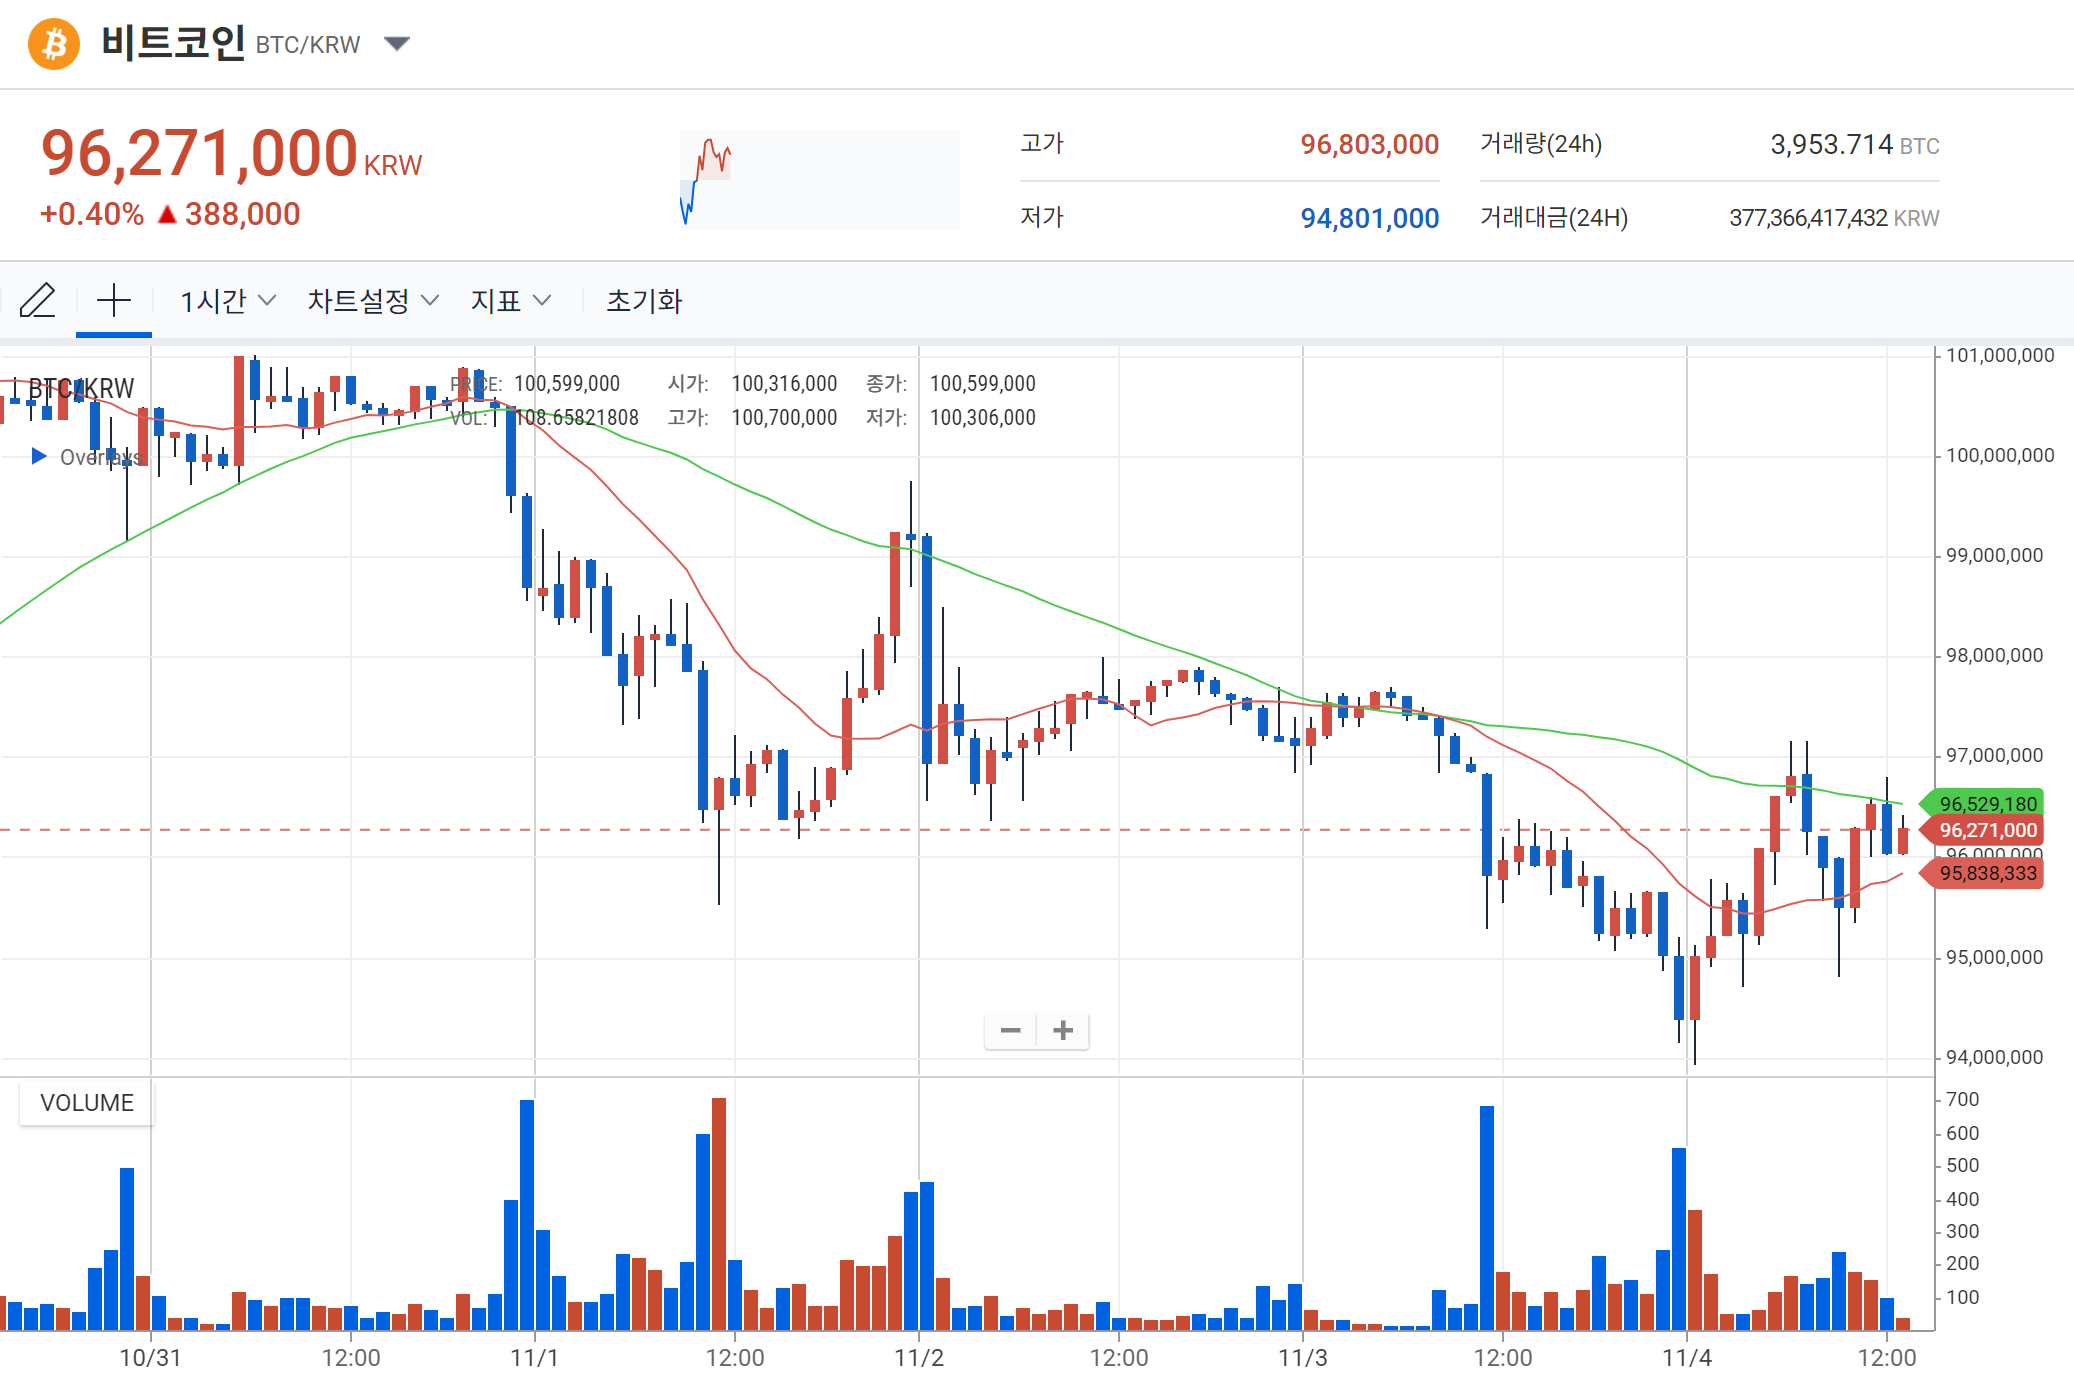

'```json\n{\n    "decision": "HOLD",\n    "summary": "현재 차트에서는 명확한 헤드 앤 숄더 패턴이나 이중 바닥/이중 천장 패턴이 나타나지 않았습니다. 최근의 하락 추세가 지속되고 있으며, 거래량이 증가하는 시점에서 큰 변동이 발생했으나, 이는 일시적인 반등으로 보입니다. 캔들스틱 패턴에서는 강력한 반전 신호가 나타나지 않았습니다. 이동 평균선이 하락세를 보이고 있어, 당분간 관망하는 것이 좋습니다. 따라서, 추가적인 시장 변동을 기다리며 HOLD 전략을 추천합니다."\n}\n```'

In [47]:
from datetime import datetime

# 현재 날짜와 시간을 기준으로 파일 이름에 형식 추가
current_time = datetime.now().strftime("%m%d_%H")

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = f"./{current_time}_upbit_full_chart_1hour.png"
# 이미지 파일로 부터 질의
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer


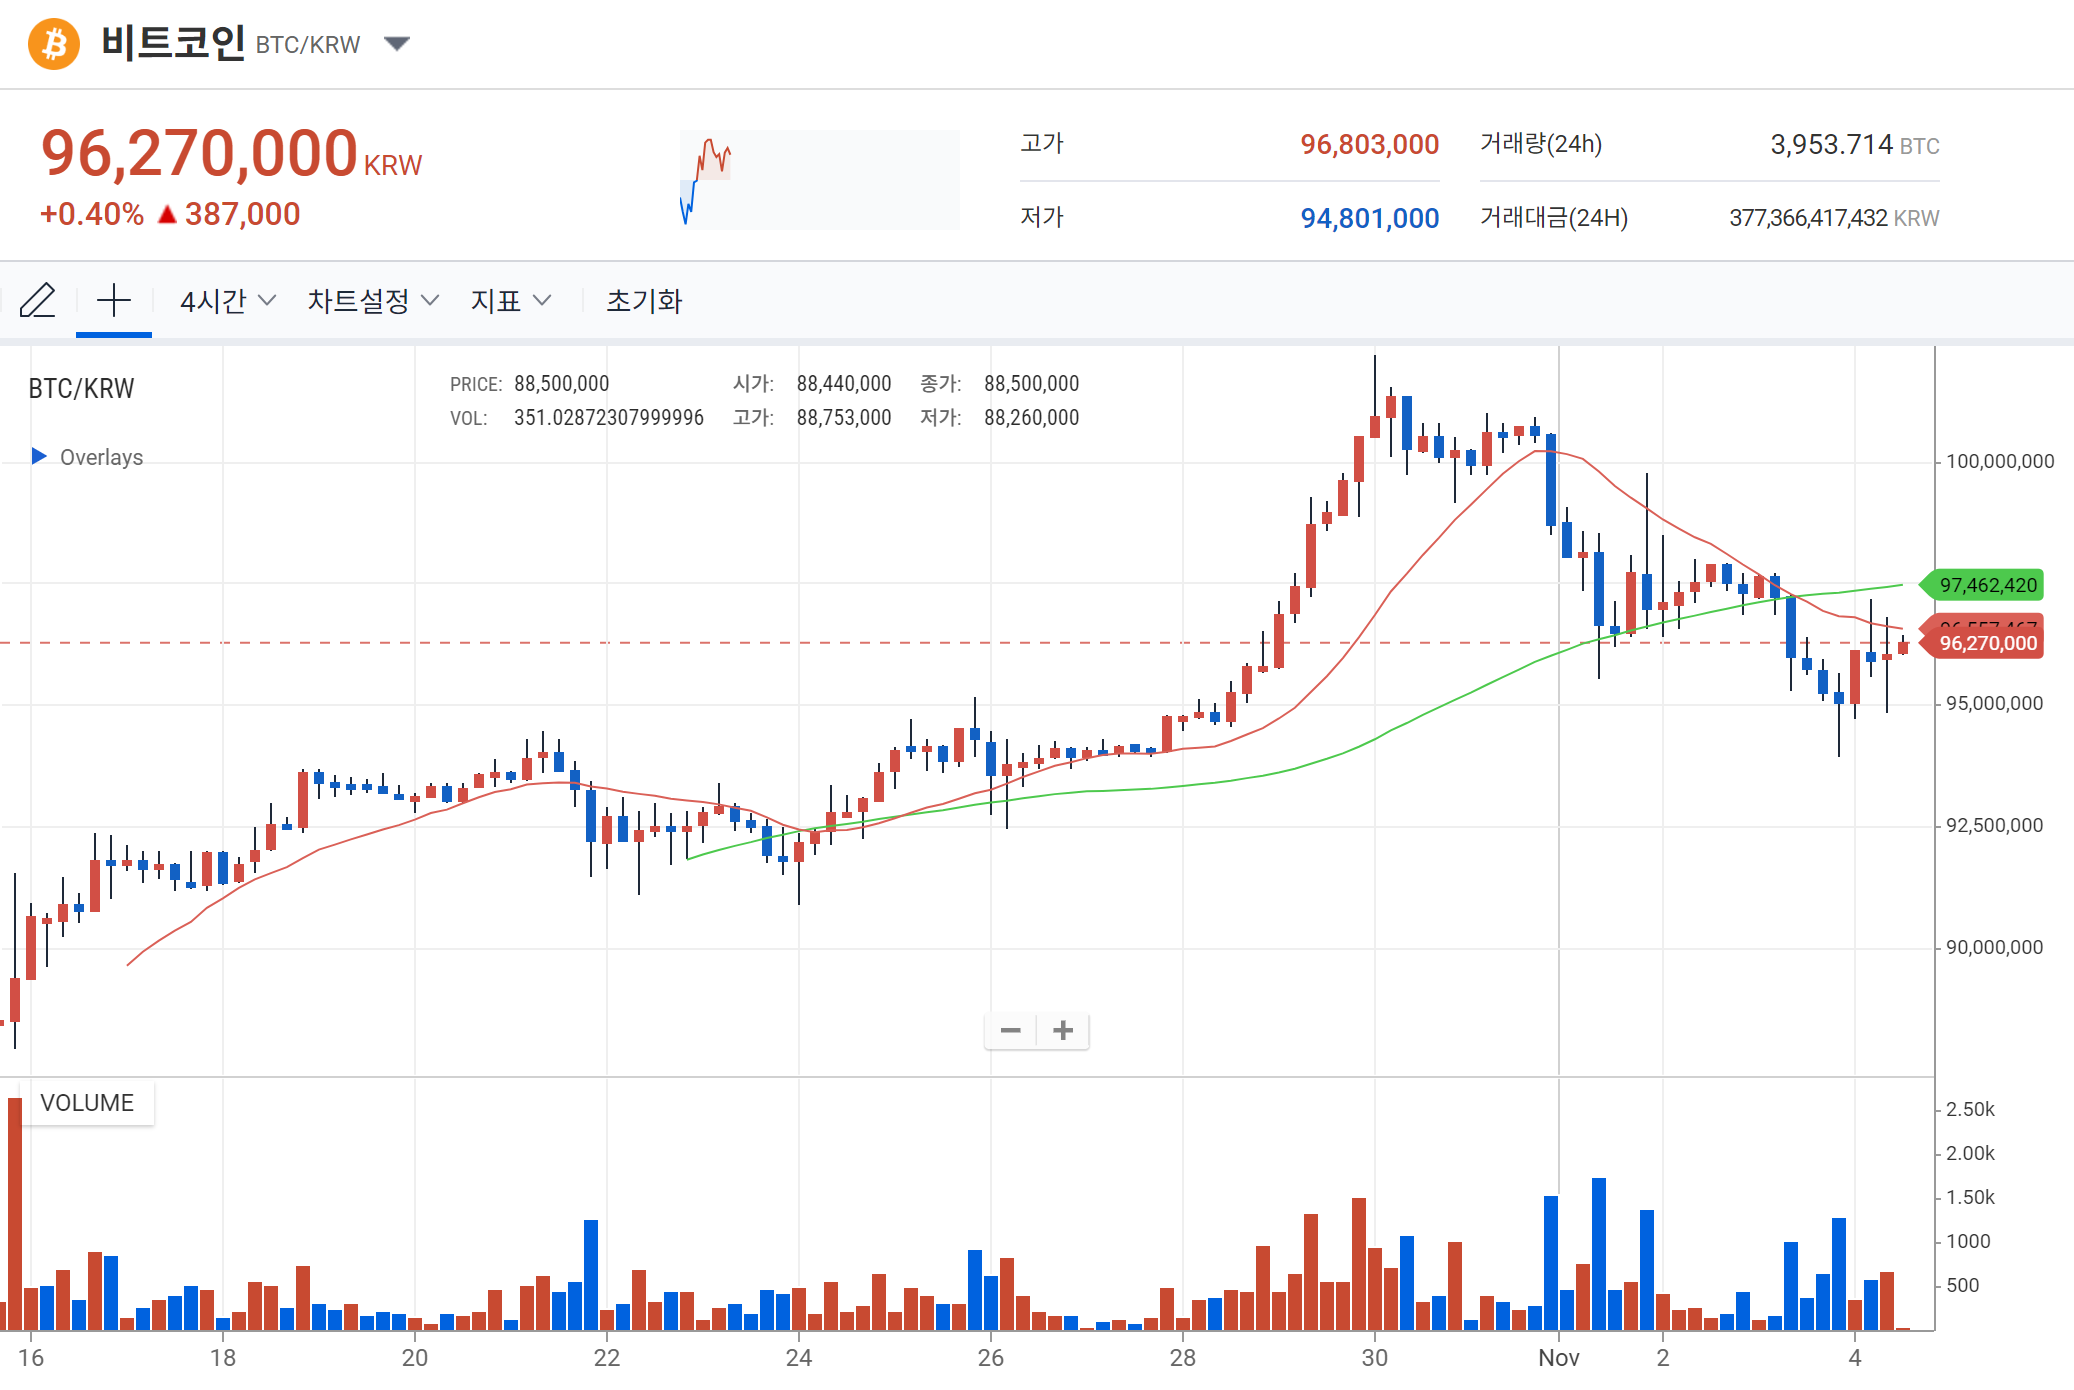

'```json\n{\n    "decision": "HOLD",\n    "summary": "현재 차트에서는 명확한 헤드 앤 숄더 패턴이나 이중 바닥/천장 패턴이 나타나지 않았습니다. 최근의 하락세 이후 가격이 약간 회복되는 모습을 보이고 있으며, 이동 평균선이 교차하는 지점에서 저항을 받고 있습니다. 거래량은 최근 하락 시점에서 증가했으나, 현재는 안정세를 보이고 있습니다. 캔들스틱 패턴에서는 뚜렷한 반전 신호가 나타나지 않았습니다. 따라서, 현재로서는 추가적인 시장 변동을 관망하며 HOLD 전략을 유지하는 것이 적절해 보입니다."\n}\n```'

In [48]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = f"./{current_time}_upbit_full_chart_4hour.png"
# 이미지 파일로 부터 질의
answer = multimodal_llm_with_prompt.invoke(IMAGE_PATH_FROM_FILE)

answer